In [60]:
import pandas as pd
import numpy as np
import bs4
import matplotlib.pyplot as plt
bean = pd.read_csv('CoffeeBean3.csv', encoding='EUC-KR')
bean.head()

,Unnamed: 0,광역시도,시도,입점수,ID
0,0,강원도,원주시,1,원주
1,1,경기도,광명시,1,광명
2,2,경기도,구리시,1,구리
3,3,경기도,군포시,1,군포
4,4,경기도,권선구,1,수원 권선


In [61]:
paik = pd.read_csv('Paikdabang3.csv', encoding='EUC-KR')
paik.head()

,Unnamed: 0,광역시도,시도,입점수,ID
0,0,강원도,강릉시,4,강릉
1,1,강원도,동해시,1,동해
2,2,강원도,삼척시,4,삼척
3,3,강원도,원주시,25,원주
4,4,강원도,춘천시,16,춘천


In [62]:
star = pd.read_csv('Starbucks3.csv', encoding='EUC-KR')
star.head()

,Unnamed: 0,광역시도,시도,입점수,ID
0,0,강원도,강릉시,3,강릉
1,1,강원도,고성군,1,고성(강원)
2,2,강원도,동해시,1,동해
3,3,강원도,속초시,3,속초
4,4,강원도,원주시,6,원주


In [63]:
Coffee = pd.merge(bean, paik, on = 'ID', how = 'right')

In [64]:
Coffee = pd.merge(Coffee, star, on = 'ID', how = 'right')

In [65]:
Coffee.rename(columns = {'입점수_x': 'bean',
                         '입점수_y': 'paik',
                         '입점수': 'star'},
              inplace = True)
Coffee = Coffee.fillna(0)
Coffee.head()

,Unnamed: 0_x,광역시도_x,시도_x,bean,ID,Unnamed: 0_y,광역시도_y,시도_y,paik,Unnamed: 0,광역시도,시도,star
0,0.0,강원도,원주시,1.0,원주,3.0,강원도,원주시,25.0,4,강원도,원주시,6
1,1.0,경기도,광명시,1.0,광명,6.0,경기도,광명시,4.0,8,경기도,광명시,8
2,2.0,경기도,구리시,1.0,구리,8.0,경기도,구리시,9.0,10,경기도,구리시,3
3,3.0,경기도,군포시,1.0,군포,9.0,경기도,군포시,64.0,11,경기도,군포시,4
4,4.0,경기도,권선구,1.0,수원 권선,10.0,경기도,권선구,4.0,12,경기도,권선구,5


In [66]:
Coffee.to_csv('coffeeShop.csv', encoding = 'euc-kr', sep = ',')

In [67]:
Coffee['총매장수'] = Coffee['bean'] + Coffee['paik'] + Coffee['star']
Coffee.head()

,Unnamed: 0_x,광역시도_x,시도_x,bean,ID,Unnamed: 0_y,광역시도_y,시도_y,paik,Unnamed: 0,광역시도,시도,star,총매장수
0,0.0,강원도,원주시,1.0,원주,3.0,강원도,원주시,25.0,4,강원도,원주시,6,32.0
1,1.0,경기도,광명시,1.0,광명,6.0,경기도,광명시,4.0,8,경기도,광명시,8,13.0
2,2.0,경기도,구리시,1.0,구리,8.0,경기도,구리시,9.0,10,경기도,구리시,3,13.0
3,3.0,경기도,군포시,1.0,군포,9.0,경기도,군포시,64.0,11,경기도,군포시,4,69.0
4,4.0,경기도,권선구,1.0,수원 권선,10.0,경기도,권선구,4.0,12,경기도,권선구,5,10.0


In [68]:
Coffee.to_csv('Coffee_totalshop.csv',encoding = 'euc-kr', sep = ',')

In [69]:
Coffee_Index = Coffee.copy()

In [70]:
draw_korea_raw = pd.read_excel('../data/05. draw_korea_raw.xlsx', encoding="EUC-KR")
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천 원미,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천 오정,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [71]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace = True)
draw_korea_raw_stacked.rename(columns = {'level_0': 'y','level_1': 'x', 0: 'ID'},
                              inplace = True)
draw_korea_raw_stacked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
5,1,4,동두천
6,1,5,연천
7,1,6,포천
8,1,7,의정부
9,1,8,인제


In [83]:
draw_korea = draw_korea_raw_stacked
# draw_korea.head()
draw_korea.tail()


,y,x,ID
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주
251,26,5,서귀포


In [73]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

In [74]:
set(draw_korea['ID'].unique()) - set(Coffee_Index['ID'].unique())
set(Coffee_Index['ID'].unique()) - set(draw_korea['ID'].unique())

{'인천 미추홀'}

In [75]:
# Coffee_Index와 draw_korea 합치기
Coffee_Index = pd.merge(Coffee_Index, draw_korea, how='right', on=['ID'])
Coffee_Index = Coffee_Index.fillna(0)
Coffee_Index.head()

,Unnamed: 0_x,광역시도_x,시도_x,bean,ID,Unnamed: 0_y,광역시도_y,시도_y,paik,Unnamed: 0,광역시도,시도,star,총매장수,y,x
0,0.0,강원도,원주시,1.0,원주,3.0,강원도,원주시,25.0,4.0,강원도,원주시,6.0,32.0,5,10
1,1.0,경기도,광명시,1.0,광명,6.0,경기도,광명시,4.0,8.0,경기도,광명시,8.0,13.0,4,4
2,2.0,경기도,구리시,1.0,구리,8.0,경기도,구리시,9.0,10.0,경기도,구리시,3.0,13.0,3,8
3,3.0,경기도,군포시,1.0,군포,9.0,경기도,군포시,64.0,11.0,경기도,군포시,4.0,69.0,9,5
4,4.0,경기도,권선구,1.0,수원 권선,10.0,경기도,권선구,4.0,12.0,경기도,권선구,5.0,10.0,10,5


In [76]:
Coffee_Index.to_csv("Coffee_Index3.csv", encoding='euc-kr', sep=',')

In [77]:
mapdata = Coffee_Index.pivot_table(index='y', columns='x', values='총매장수')
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
mapdata

x,0,1,2,3,4,5,6,7,8,9,10,11,12,13
y,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,4.0,2.0,0.0,3.0,26.0,0.0,21.0,3.0,NaN,NaN,NaN
2,NaN,NaN,NaN,36.0,21.0,2.0,38.0,17.0,4.0,0.0,0.0,NaN,NaN,NaN
3,NaN,NaN,43.0,15.0,59.0,7.0,49.0,0.0,13.0,11.0,0.0,7.0,NaN,NaN
4,NaN,NaN,58.0,20.0,13.0,38.0,92.0,35.0,11.0,2.0,0.0,2.0,NaN,NaN
5,NaN,0.0,99.0,94.0,45.0,75.0,102.0,25.0,41.0,3.0,32.0,0.0,NaN,NaN
6,NaN,22.0,0.0,54.0,81.0,24.0,35.0,40.0,161.0,7.0,0.0,0.0,NaN,NaN
7,NaN,1.0,11.0,3.0,31.0,36.0,134.0,11.0,3.0,6.0,0.0,0.0,NaN,NaN
8,NaN,NaN,14.0,43.0,74.0,11.0,344.0,189.0,12.0,28.0,1.0,0.0,NaN,0.0


In [80]:
import pandas as pd
import numpy as np
import platform

# 한글 사용하기
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.rcParams['axes.unicode_minus'] = False


# 지도 함수 만들기
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) -
                     min(blockedMap[targetData])) * 0.25 + \
                     min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname,
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다.
        # (중구, 서구)
        if len(row['ID'].split()) == 2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2] == '고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x'] + 0.5, row['y'] + 0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계를 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

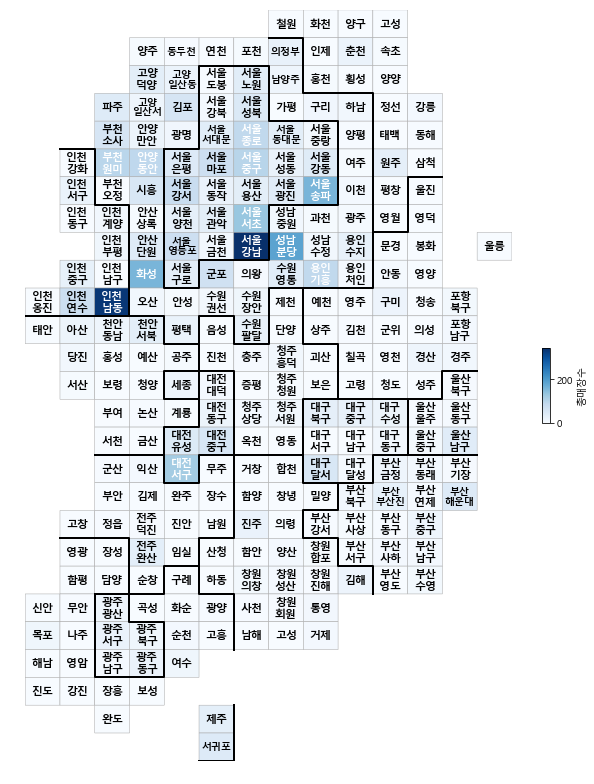

In [81]:
drawKorea('총매장수', Coffee_Index, 'Blues')